# <font color = 'Forestgreen'> Project Day: Focusing on Video Game Sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\sharm\Downloads\archive (2)\vgsales.csv")

 # <font color = 'forestgreen'> Main focus areas:

**- EU/JP sales (with some comparisons with NA sales)**      ***#all sales are in the millions***

# Step 1 : Data Cleaning/Transforming

In [7]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.isnull().sum()                       #this checks the number of missing values in a column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<font color = 'forestgreen'> - **As shown above, there many missing values under the column 'Year' and some in 'Publisher**

In [21]:
df.loc[df.isnull().any(axis=1)]          #axis 1 finds missing values for all the columns in each row    

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


- **For many 'Year' missing values, the name of the game contains the year which might be why they did not input the year.**

In [159]:
df.describe(include = ['O'])

,Name,Platform,Year,Publisher
count,16598,16598,16598,16540
unique,11493,31,40,578
top,Need for Speed: Most Wanted,DS,2009,Electronic Arts
freq,12,2163,1431,1351


**Duplicates are bound to happen. As one game could be released on different consoles- so there could be 3/4 versions of one game.**

**Having said that, there are over 5000 duplicates. Somewhere there might have been some games that have copied a few times, with the same platform/publisher**

In [5]:
df.drop(['Genre'], axis = 1, inplace = True)                   #dropped 'Genre'

In [6]:
df.drop(['Other_Sales'], axis = 1, inplace = True)             #dropped 'Other_Sales'
df

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Kemco,0.01,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Infogrames,0.01,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Activision,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,7G//AMES,0.00,0.01,0.00,0.01


<font color = 'forestgreen'> - **Since it does not specify exactly what entails in 'Other_Sales' - I have decided that I have no need for that data for analytics**

<font color = 'forestgreen'>  - **Also, I will be mainly focusing on Global,EU & Japan sales (maybe refer to N.America for comparisons)**

In [7]:
df.drop(['Global_Sales'], axis = 1, inplace = True)             #dropped 'Global_Sales'

df['Total Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']   #created a new column 'Total_Sales'
df

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Total Sales
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,74.28
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,39.47
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,32.52
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,30.38
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Kemco,0.01,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Infogrames,0.01,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Activision,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010.0,7G//AMES,0.00,0.01,0.00,0.01


<font color = 'forestgreen'> - **Made a new column, 'Total Sales', which includes NA/JP/EU**
    
<font color = 'forestgreen'> - Global sales was the total sales, but since I got rid of 'Other_sales' - it would be incorrect
    
<font color = 'forestgreen'> - Therefore I made a new total sales column, and to get rid of confusion: dropped 'Global_Sales'

- **need to figure out how to remove year and rank from the above, so it only focuses on the sales**
- **also need to make 'year' not a float**  #ANSW: convert float to int

In [14]:
Allsales = (df.iloc[:,[1,5,6,7,8]])                   #make this a separate DF (focusing only on sales)?

In [15]:
Allsales                                             #for data vis

,Name,NA_Sales,EU_Sales,JP_Sales,Total Sales
0,Wii Sports,41.49,29.02,3.77,74.28
1,Super Mario Bros.,29.08,3.58,6.81,39.47
2,Mario Kart Wii,15.85,12.88,3.79,32.52
3,Wii Sports Resort,15.75,11.01,3.28,30.04
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,30.38
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,0.01,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,0.00,0.00,0.00,0.00
16596,Know How 2,0.00,0.01,0.00,0.01


# Most recent DF

In [59]:
cols = ["Year"]
for col in cols:
   df[col] = df[col].apply(lambda x: int(x) if x == x else "")

<font color = 'forestgreen'> - **Converted 'Year' to an integer as it was considered as a float previously**
    
   - **This actually converted into an object.**

In [60]:
df

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Total Sales
0,1,Wii Sports,Wii,2006,Nintendo,41.49,29.02,3.77,74.28
1,2,Super Mario Bros.,NES,1985,Nintendo,29.08,3.58,6.81,39.47
2,3,Mario Kart Wii,Wii,2008,Nintendo,15.85,12.88,3.79,32.52
3,4,Wii Sports Resort,Wii,2009,Nintendo,15.75,11.01,3.28,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,11.27,8.89,10.22,30.38
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Kemco,0.01,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Infogrames,0.01,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Activision,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010,7G//AMES,0.00,0.01,0.00,0.01


In [9]:
Top10 = (df.head(n=10))                  

In [10]:
Top10                                            #will use this for data vis

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Total Sales
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,74.28
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,39.47
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,32.52
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,30.04
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,30.38
5,6,Tetris,GB,1989.0,Nintendo,23.20,2.26,4.22,29.68
6,7,New Super Mario Bros.,DS,2006.0,Nintendo,11.38,9.23,6.50,27.11
7,8,Wii Play,Wii,2006.0,Nintendo,14.03,9.20,2.93,26.16
8,9,New Super Mario Bros. Wii,Wii,2009.0,Nintendo,14.59,7.06,4.70,26.35
9,10,Duck Hunt,NES,1984.0,Nintendo,26.93,0.63,0.28,27.84


<font color = 'forestgreen'> - **will be referring to the Top 10 for future inferences**

# <font color = 'Purple'> Data visuals:

- **Comparing how sales differed b/w NA/Eu/Jp for the Top 10s (or all years?)** (bar chart/histo ?)
- if that is too big, maybe do only Eu vs JP?


- **Comparing how many Nintendo games there are, in comparison to other publishers**  (Top10 for Publishers ?)
- can include count of nintendo games vs others // mean? // *percentages would be better for all data vis shown*


- **which year released most game(any publisher) or year bracket?** (print a sorted version beforehand for 'Year'(desc))
- which games did best if there are many in one year

In [ ]:
# Top10 
# Allsales
# Publishers

In [11]:
Publishers = (df[['Name','Year','Publisher']])

In [64]:
Publishers

,Name,Year,Publisher
0,Wii Sports,2006,Nintendo
1,Super Mario Bros.,1985,Nintendo
2,Mario Kart Wii,2008,Nintendo
3,Wii Sports Resort,2009,Nintendo
4,Pokemon Red/Pokemon Blue,1996,Nintendo
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,2002,Kemco
16594,Men in Black II: Alien Escape,2003,Infogrames
16595,SCORE International Baja 1000: The Official Game,2008,Activision
16596,Know How 2,2010,7G//AMES


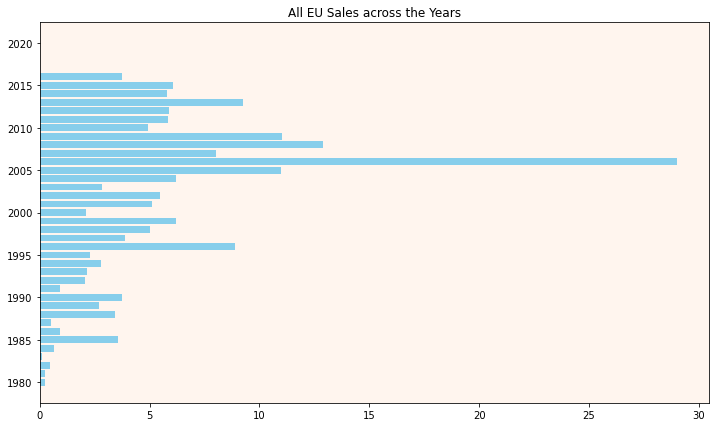

In [64]:
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_facecolor('seashell')
plt.barh(df['Year'],df['EU_Sales'],color='skyblue')
plt.title('All EU Sales across the Years')
plt.show()

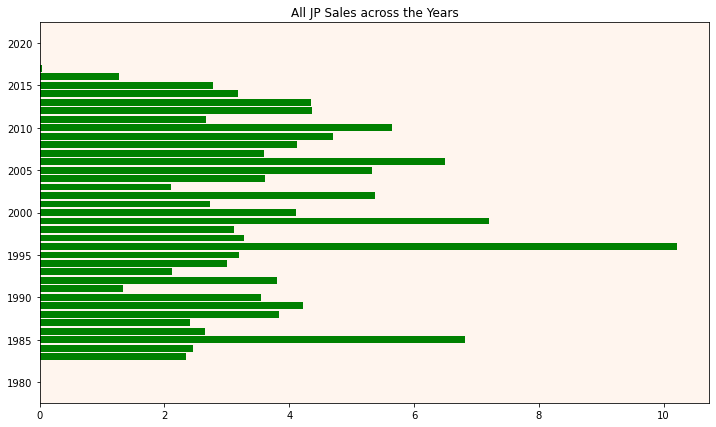

In [66]:
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_facecolor('seashell')
plt.barh(df['Year'],df['JP_Sales'],color='green')
plt.title('All JP Sales across the Years')
plt.show()

In [78]:
Year_sales=df.groupby("Year")["Total Sales"].sum().to_frame().reset_index()     

#temporary column for Year_sales
Year_sales

,Year,Total Sales
0,1980.0,11.26
1,1981.0,35.36
2,1982.0,28.57
3,1983.0,16.66
4,1984.0,49.65
5,1985.0,53.03
6,1986.0,35.15
7,1987.0,21.50
8,1988.0,46.22
9,1989.0,71.95


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df2 = df.groupby(['Year']).count().head(40)
df2

,Rank,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Total Sales
Year,,,,,,,,
1980.0,9,9,9,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46
1982.0,36,36,36,36,36,36,36,36
1983.0,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14
1985.0,14,14,14,14,14,14,14,14
1986.0,21,21,21,21,21,21,21,21
1987.0,16,16,16,16,16,16,16,16
1988.0,15,15,15,15,15,15,15,15


(5.0, 0.0)

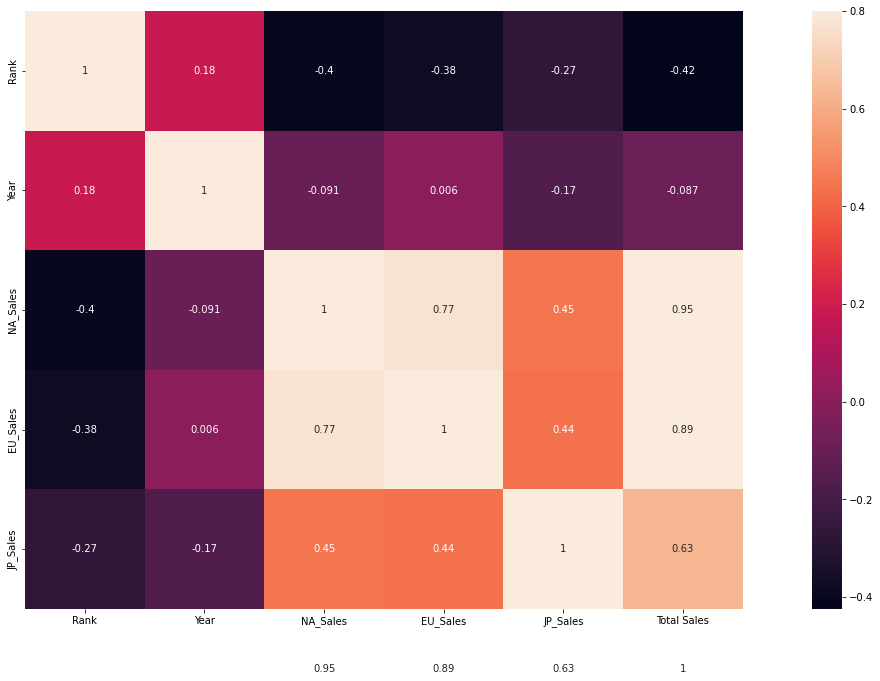

In [59]:
plt.figure(figsize=(25,11))
ax = sns.heatmap(df.corr(), vmax=0.8, square=True, annot_kws={'size':10}, annot=True)
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0)

- **Not entirely sure on how to read the heatmap...will need to break it down**

In [183]:
df.fillna(-999,inplace=True)

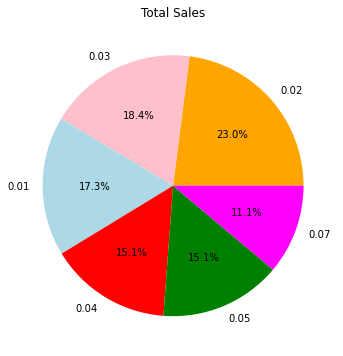

In [53]:
value = df['Total Sales'].value_counts().head(6)
my_colors = ['orange', 'pink', 'lightblue','red','green','magenta']
my_explode = (0,0.2,0)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('Total Sales')
plt.show()

In [196]:
df.dtypes                              #was trying to convert 'Year' type... did not work 

Rank             int64
Name            object
Platform        object
Year            object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Total Sales    float64
dtype: object

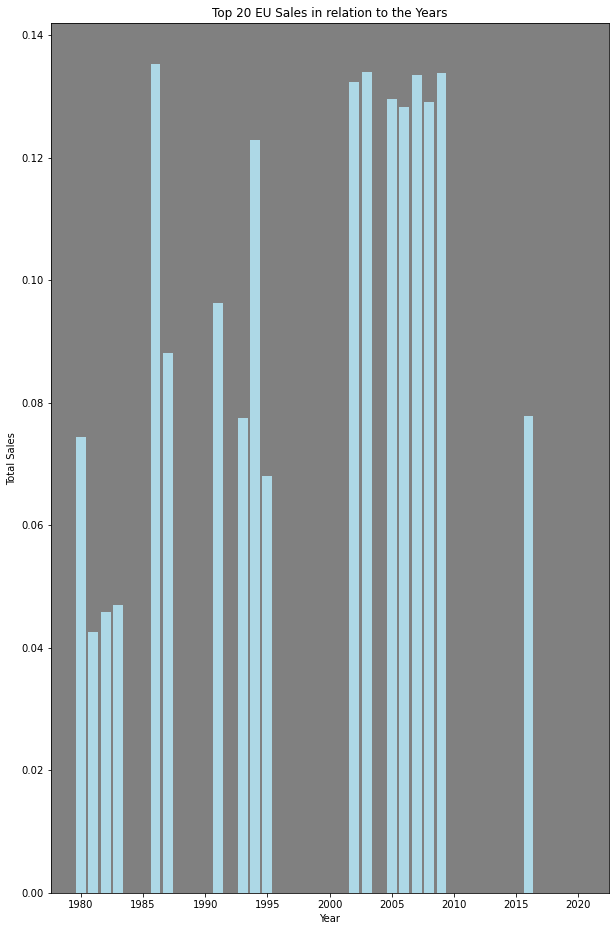

In [48]:
dfsales = df.groupby('Year')['EU_Sales'].agg(['mean']).sort_values(by=('mean'),ascending=True).reset_index().head(20)

fig1, ax1 = plt.subplots(figsize=(10, 16))
ax1.set_facecolor('gray')
ax1.bar(dfsales['Year'],dfsales['mean'],color='lightblue')
plt.title('Top 20 EU Sales in relation to the Years')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

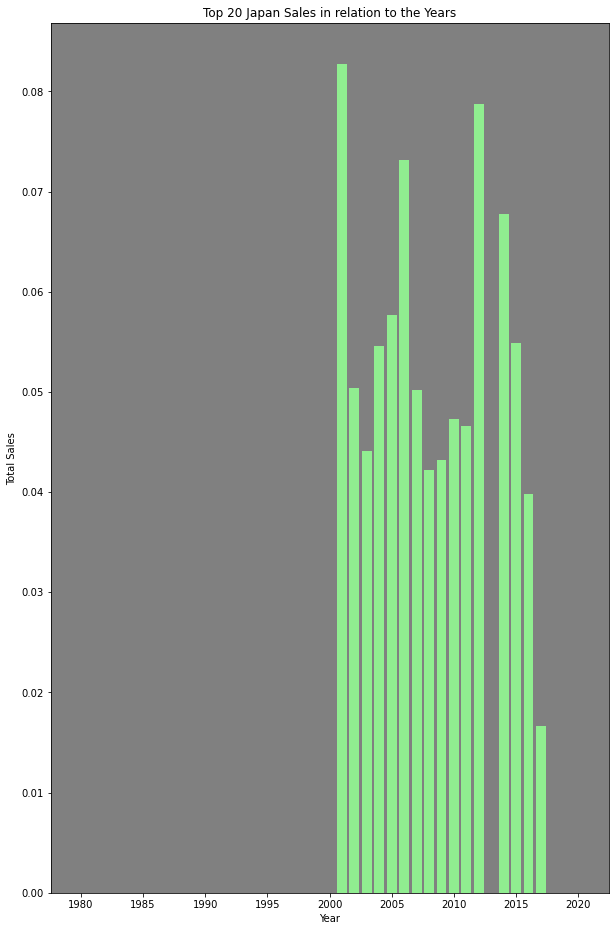

In [50]:
dfsales = df.groupby('Year')['JP_Sales'].agg(['mean']).sort_values(by=('mean'),ascending=True).reset_index().head(20)

fig1, ax1 = plt.subplots(figsize=(10, 16))
ax1.set_facecolor('gray')
ax1.bar(dfsales['Year'],dfsales['mean'],color='lightgreen')
plt.title('Top 20 Japan Sales in relation to the Years')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

In [79]:
str('Year')

'Year'

In [81]:
df.dtypes

Rank             int64
Name            object
Platform        object
Year           float64
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Total Sales    float64
dtype: object